<a href="https://colab.research.google.com/github/Kollaramaheshwarrao/Employee-Burnout-Analysis/blob/main/Employee_Burnout_Analysis_using_AI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
from google.colab import files
uploaded = files.upload()  # Upload the Excel file


Saving employee_burnout_analysis-AI 2.xlsx to employee_burnout_analysis-AI 2 (1).xlsx


In [13]:
import pandas as pd

# Load the dataset
file_path = 'employee_burnout_analysis-AI 2.xlsx'  # Update with your file's name
data = pd.ExcelFile(file_path)

# Load the specific sheet
df = data.parse('in')  # Replace 'in' with the sheet name if different
df.head()  # View the first few rows


,Employee ID,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
0,fffe32003000360033003200,2008-09-30,Female,Service,No,2,3.0,3.8,0.16
1,fffe3700360033003500,2008-11-30,Male,Service,Yes,1,2.0,5.0,0.36
2,fffe31003300320037003900,2008-03-10,Female,Product,Yes,2,NaN,5.8,0.49
3,fffe32003400380032003900,2008-11-03,Male,Service,Yes,1,1.0,2.6,0.20
4,fffe31003900340031003600,2008-07-24,Female,Service,No,3,7.0,6.9,0.52


In [14]:
df.fillna(method='ffill', inplace=True)  # Example: forward fill for missing values


<ipython-input-14-de4eacd7d0ac>:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Example: forward fill for missing values


In [16]:
df['Gender'] = df['Gender'].map({'Male': 1, 'Female': 0})
df['WFH Setup Available'] = df['WFH Setup Available'].map({'Yes': 1, 'No': 0})


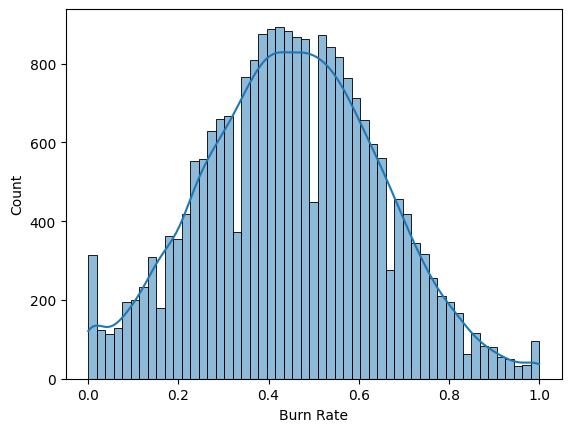

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df['Burn Rate'], kde=True)
plt.show()


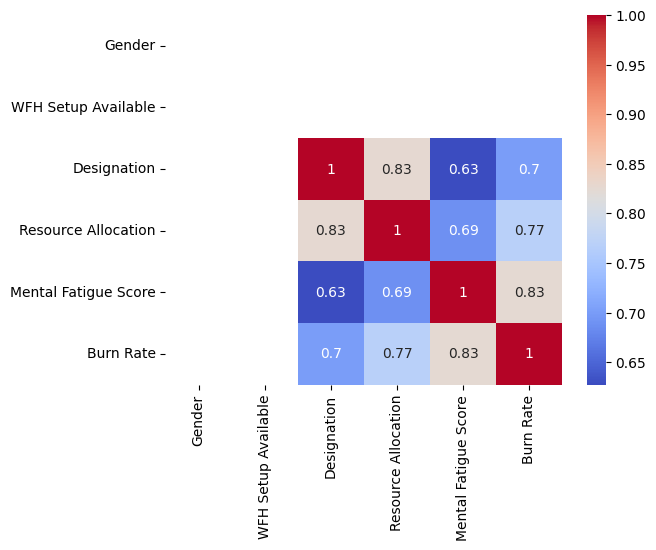

In [19]:

numeric_df = df.select_dtypes(include=['number'])
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.show()


In [22]:
print(df.columns)


Index(['Date of Joining', 'Gender', 'Company Type', 'WFH Setup Available',
       'Designation', 'Resource Allocation', 'Mental Fatigue Score',
       'Burn Rate'],
      dtype='object')


In [24]:
X = df.drop(columns=['Burn Rate'])  # Remove only the target column
y = df['Burn Rate']  # Target variable


In [25]:
df.columns = df.columns.str.strip()  # Removes extra spaces from column names
df.columns = df.columns.str.replace(' ', '_')  # Replaces spaces with underscores


In [29]:
print(df.columns.tolist())



['Date_of_Joining', 'Gender', 'Company_Type', 'WFH_Setup_Available', 'Designation', 'Resource_Allocation', 'Mental_Fatigue_Score', 'Burn_Rate']


In [30]:
df.columns = df.columns.str.strip()  # Remove leading/trailing spaces
df.columns = df.columns.str.replace(' ', '_')  # Replace spaces with underscores
print(df.columns.tolist())  # Confirm cleaned column names


['Date_of_Joining', 'Gender', 'Company_Type', 'WFH_Setup_Available', 'Designation', 'Resource_Allocation', 'Mental_Fatigue_Score', 'Burn_Rate']


In [32]:
!pip install pandas openpyxl scikit-learn seaborn matplotlib


In [33]:
# Clean column names
df.columns = df.columns.str.strip()  # Remove leading/trailing spaces
df.columns = df.columns.str.replace(' ', '_')  # Replace spaces with underscores

# Check column names
print(df.columns.tolist())


['Date_of_Joining', 'Gender', 'Company_Type', 'WFH_Setup_Available', 'Designation', 'Resource_Allocation', 'Mental_Fatigue_Score', 'Burn_Rate']


In [35]:
print(df.columns.tolist())


['Date_of_Joining', 'Gender', 'Company_Type', 'WFH_Setup_Available', 'Designation', 'Resource_Allocation', 'Mental_Fatigue_Score', 'Burn_Rate']


In [36]:
# Drop the target column 'Burn Rate' only
X = df.drop(columns=['Burn_Rate'])
y = df['Burn_Rate']

# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Verify the shapes of the splits
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (18200, 7)
X_test shape: (4550, 7)
y_train shape: (18200,)
y_test shape: (4550,)


In [37]:
!pip install scikit-learn


<ipython-input-47-8b659001fd4e>:18: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Resource Allocation'].fillna(df['Resource Allocation'].median(), inplace=True)
<ipython-input-47-8b659001fd4e>:19: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].me

Mean Squared Error (MSE): 0.004185356525552025
Mean Absolute Error (MAE): 0.04976672346608547
R² Score: 0.8901147100909473


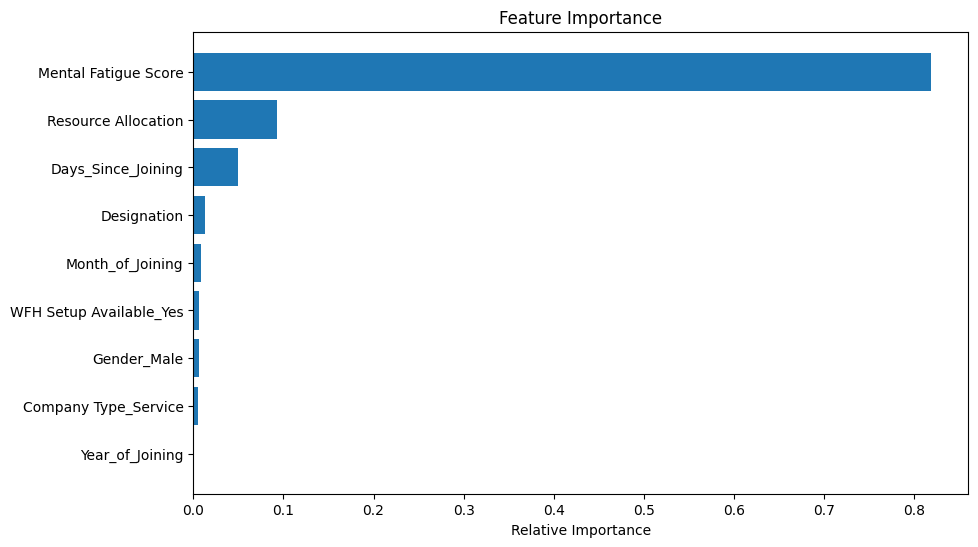

In [47]:
# Load dataset
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import numpy as np

# Load the dataset
file_path = "employee_burnout_analysis-AI 2.xlsx"
data = pd.ExcelFile(file_path)
df = data.parse('in')

# Drop irrelevant columns
df = df.drop(columns=['Employee ID'])

# Handle missing values
df['Resource Allocation'].fillna(df['Resource Allocation'].median(), inplace=True)
df['Mental Fatigue Score'].fillna(df['Mental Fatigue Score'].median(), inplace=True)
df = df.dropna(subset=['Burn Rate'])  # Drop rows where Burn Rate is missing

# Feature extraction from 'Date of Joining'
df['Year_of_Joining'] = df['Date of Joining'].dt.year
df['Month_of_Joining'] = df['Date of Joining'].dt.month
df['Days_Since_Joining'] = (pd.Timestamp.now() - df['Date of Joining']).dt.days
df = df.drop(columns=['Date of Joining'])

# One-hot encoding for categorical variables
df = pd.get_dummies(df, columns=['Gender', 'Company Type', 'WFH Setup Available'], drop_first=True)

# Define features and target
X = df.drop(columns=['Burn Rate'])
y = df['Burn Rate']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("R² Score:", r2)

# Feature importance
importances = model.feature_importances_
feature_names = X.columns
indices = np.argsort(importances)

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.title("Feature Importance")
plt.barh(range(len(indices)), importances[indices], align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()


In [49]:
import joblib
joblib.dump(model, 'employee_burnout_model.pkl')


['employee_burnout_model.pkl']

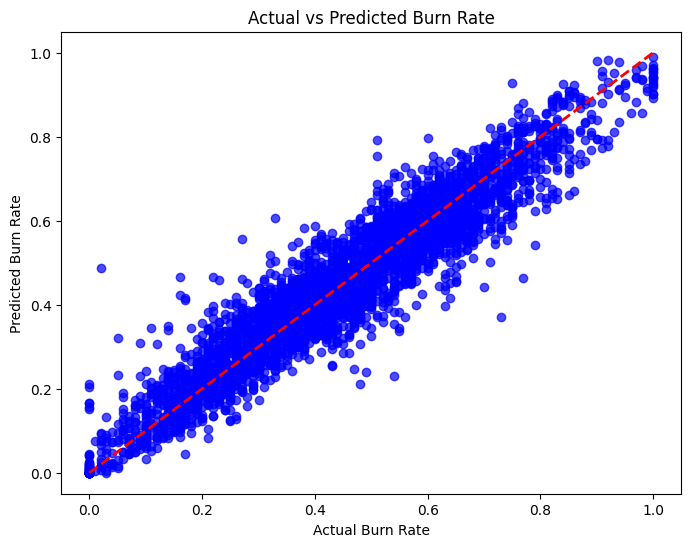

In [50]:
# Plot actual vs predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7, color='blue')
plt.plot([0, 1], [0, 1], '--', color='red', linewidth=2)
plt.title("Actual vs Predicted Burn Rate")
plt.xlabel("Actual Burn Rate")
plt.ylabel("Predicted Burn Rate")
plt.show()


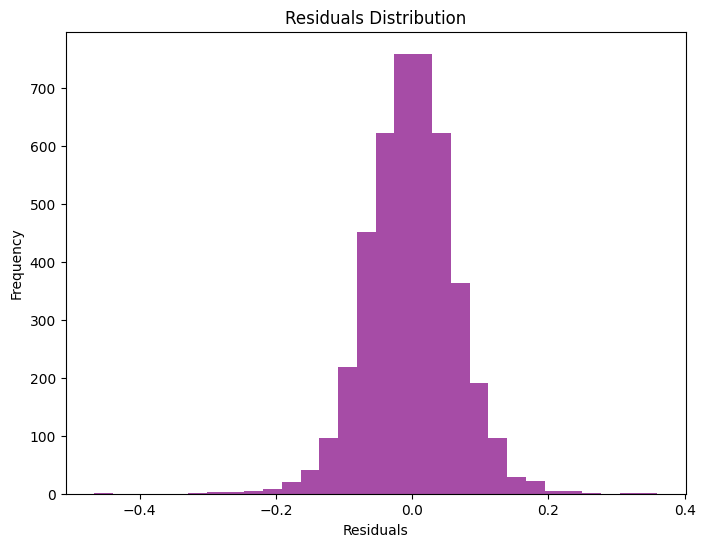

In [51]:
residuals = y_test - y_pred

# Plot residuals
plt.figure(figsize=(8, 6))
plt.hist(residuals, bins=30, color='purple', alpha=0.7)
plt.title("Residuals Distribution")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()


In [2]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(random_state=42)


In [9]:

print(X_train.shape, X_test.shape)
print(X_train.head())


(14872, 8) (3718, 8)
                    Employee ID Date of Joining  Gender Company Type  \
19000  fffe31003400310036003600      2008-04-13    Male      Product   
19405  fffe32003000350032003900      2008-06-10    Male      Service   
9965   fffe33003000330036003500      2008-09-28  Female      Product   
613        fffe3500320034003200      2008-06-09  Female      Product   
3475   fffe31003600310034003200      2008-12-13    Male      Product   

      WFH Setup Available  Designation  Resource Allocation  \
19000                 Yes            2                  6.0   
19405                  No            3                  7.0   
9965                   No            2                  3.0   
613                    No            3                  6.0   
3475                   No            0                  1.0   

       Mental Fatigue Score  
19000                   8.8  
19405                   7.1  
9965                    6.0  
613                     4.9  
3475             

In [3]:
import pandas as pd

# Load the dataset
df = pd.read_excel('employee_burnout_analysis-AI 2.xlsx')  # Replace with your actual file path

# Display the first few rows
print(df.head())

# Check data types and missing values
print(df.info())
print(df.isnull().sum())



                Employee ID Date of Joining  Gender Company Type  \
0  fffe32003000360033003200      2008-09-30  Female      Service   
1      fffe3700360033003500      2008-11-30    Male      Service   
2  fffe31003300320037003900      2008-03-10  Female      Product   
3  fffe32003400380032003900      2008-11-03    Male      Service   
4  fffe31003900340031003600      2008-07-24  Female      Service   

  WFH Setup Available  Designation  Resource Allocation  Mental Fatigue Score  \
0                  No            2                  3.0                   3.8   
1                 Yes            1                  2.0                   5.0   
2                 Yes            2                  NaN                   5.8   
3                 Yes            1                  1.0                   2.6   
4                  No            3                  7.0                   6.9   

   Burn Rate  
0       0.16  
1       0.36  
2       0.49  
3       0.20  
4       0.52  
<class 'pandas

In [4]:
# Drop rows with missing values
df.dropna(inplace=True)

# Ensure all columns are numeric
df = df.apply(pd.to_numeric, errors='coerce')

# Fill any remaining NaN values with 0
df.fillna(0, inplace=True)

# Verify the cleaned dataset
print(df.head())


   Employee ID      Date of Joining  Gender  Company Type  \
0          0.0  1222732800000000000     0.0           0.0   
1          0.0  1228003200000000000     0.0           0.0   
3          0.0  1225670400000000000     0.0           0.0   
4          0.0  1216857600000000000     0.0           0.0   
5          0.0  1227657600000000000     0.0           0.0   

   WFH Setup Available  Designation  Resource Allocation  \
0                  0.0            2                  3.0   
1                  0.0            1                  2.0   
3                  0.0            1                  1.0   
4                  0.0            3                  7.0   
5                  0.0            2                  4.0   

   Mental Fatigue Score  Burn Rate  
0                   3.8       0.16  
1                   5.0       0.36  
3                   2.6       0.20  
4                   6.9       0.52  
5                   3.6       0.29  


In [5]:
# One-hot encode categorical columns if needed
df = pd.get_dummies(df, drop_first=True)

# Verify encoded dataset
print(df.head())


   Employee ID      Date of Joining  Gender  Company Type  \
0          0.0  1222732800000000000     0.0           0.0   
1          0.0  1228003200000000000     0.0           0.0   
3          0.0  1225670400000000000     0.0           0.0   
4          0.0  1216857600000000000     0.0           0.0   
5          0.0  1227657600000000000     0.0           0.0   

   WFH Setup Available  Designation  Resource Allocation  \
0                  0.0            2                  3.0   
1                  0.0            1                  2.0   
3                  0.0            1                  1.0   
4                  0.0            3                  7.0   
5                  0.0            2                  4.0   

   Mental Fatigue Score  Burn Rate  
0                   3.8       0.16  
1                   5.0       0.36  
3                   2.6       0.20  
4                   6.9       0.52  
5                   3.6       0.29  


In [6]:
# Define features (X) and target (y)
X = df.drop(columns=['Burn Rate'])  # Replace 'Burn Rate' with your target column
y = df['Burn Rate']

# Verify shapes
print(X.shape, y.shape)


(18590, 8) (18590,)


In [7]:
from sklearn.model_selection import train_test_split

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the shapes of train and test sets
print(X_train.shape, X_test.shape)


(14872, 8) (3718, 8)


In [8]:
from sklearn.ensemble import RandomForestRegressor

# Initialize the model
model = RandomForestRegressor(random_state=42)

# Fit the model
model.fit(X_train, y_train)

# Verify training
print("Model trained successfully!")


Model trained successfully!


In [9]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, n_jobs=-1, scoring='r2')

# Perform grid search
grid_search.fit(X_train, y_train)

# Get the best model
best_model = grid_search.best_estimator_
print("Best parameters:", grid_search.best_params_)


Best parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 200}


In [10]:
import joblib

# Save the best model
joblib.dump(best_model, 'employee_burnout_model.pkl')
print("Model saved as employee_burnout_model.pkl")


Model saved as employee_burnout_model.pkl


In [11]:
# Make predictions on the test set
y_pred = best_model.predict(X_test)

# Evaluate performance
from sklearn.metrics import r2_score, mean_squared_error

r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f"R2 Score: {r2}")
print(f"Mean Squared Error: {mse}")


R2 Score: 0.9240964979345988
Mean Squared Error: 0.002915057783749828


                Feature  Importance
7  Mental Fatigue Score    0.951140
6   Resource Allocation    0.034155
1       Date of Joining    0.010391
5           Designation    0.004314
0           Employee ID    0.000000
2                Gender    0.000000
3          Company Type    0.000000
4   WFH Setup Available    0.000000


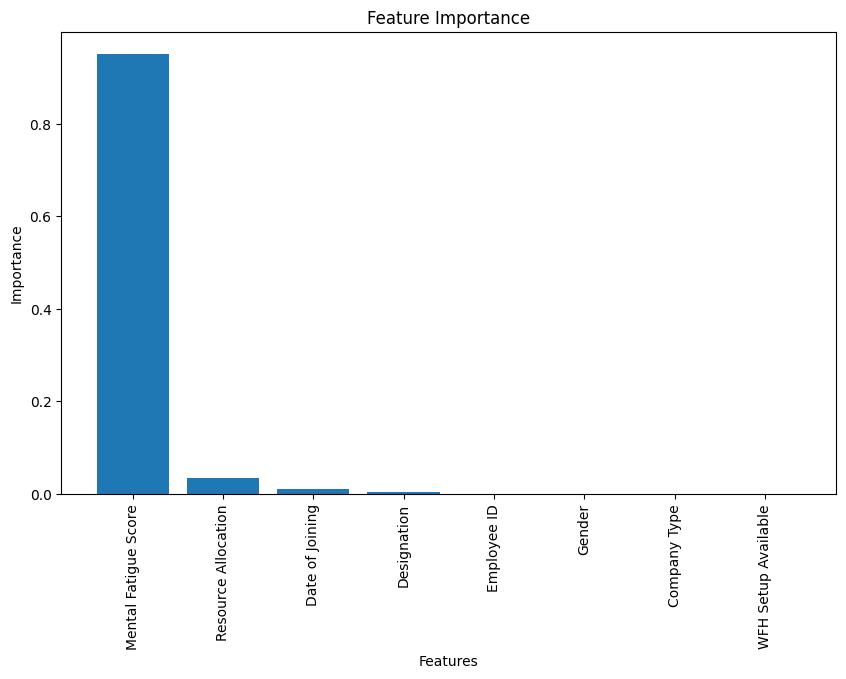

In [12]:
# Extract feature importances from the trained model
importances = best_model.feature_importances_

# Create a DataFrame for better visualization
feature_importances = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print(feature_importances)

# Plot feature importances
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.bar(feature_importances['Feature'], feature_importances['Importance'])
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance')
plt.xticks(rotation=90)
plt.show()


In [13]:
import joblib

# Save the model
joblib.dump(best_model, 'employee_burnout_model.pkl')
print("Model saved as employee_burnout_model.pkl")


Model saved as employee_burnout_model.pkl


In [14]:
# Load the saved model
loaded_model = joblib.load('employee_burnout_model.pkl')
print("Model loaded successfully!")


Model loaded successfully!


In [17]:

sample_data = pd.DataFrame([{
    'Gender': 'Male',  # Example: Male/Female
    'Company Type': 'Service',  # Example: Product/Service
    'WFH Setup Available': 'Yes',  # Example: Yes/No
    'Resource Allocation': 7,  # Example: 1-10 (Numeric value)
    'Mental Fatigue Score': 0.5,  # Example: Between 0-1
    'Date_of_Joining': '2020-01-01'  # Example: yyyy-mm-dd
}])

sample_data['Date_of_Joining'] = pd.to_datetime(sample_data['Date_of_Joining'])  # Convert to datetime
sample_data['Joining_Year'] = sample_data['Date_of_Joining'].dt.year  # Extract year
sample_data = sample_data.drop(columns=['Date_of_Joining'])  # Drop original date column

# Match columns to training data
sample_data = pd.get_dummies(sample_data, drop_first=True)
sample_data = sample_data.reindex(columns=X_train.columns, fill_value=0)

# Make a prediction
predicted_burn_rate = loaded_model.predict(sample_data)
print("Predicted Burn Rate:", predicted_burn_rate)



Predicted Burn Rate: [0.01369905]


In [18]:
!pip install flask


In [19]:
from flask import Flask, request, jsonify
import joblib
import pandas as pd

app = Flask(__name__)

# Load the trained model
model = joblib.load('employee_burnout_model.pkl')

@app.route('/predict', methods=['POST'])
def predict():
    # Get JSON input
    input_data = request.get_json()

    # Convert JSON to DataFrame
    input_df = pd.DataFrame([input_data])

    # Ensure columns are in the correct order
    input_df = input_df[X_train.columns]

    # Make prediction
    prediction = model.predict(input_df)

    return jsonify({'Burn Rate': prediction.tolist()})

if __name__ == '__main__':
    app.run(debug=True)


 * Serving Flask app '__main__'
 * Debug mode: on


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit
INFO:werkzeug: * Restarting with stat


In [21]:

!pip install gradio




   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.2/57.2 MB 12.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 320.4/320.4 kB 21.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.8/94.8 kB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.2/11.2 MB 66.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.2/73.2 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.3/62.3 kB 3.5 MB/s eta 0:00:00
  Attempting uninstall: markupsafe
    Found existing installation: MarkupSafe 3.0.2
    Uninstalling MarkupSafe-3.0.2:
      Successfully uninstalled MarkupSafe-3.0.2


In [2]:
import joblib

# Load the saved model
model = joblib.load('employee_burnout_model.pkl')  # Replace with your model filename


In [4]:
def predict_burnout(inputs):

    # Convert inputs to DataFrame
    import pandas as pd
    input_df = pd.DataFrame([inputs], columns=['Feature1', 'Feature2', 'Feature3'])  # Replace with your feature names
    prediction = model.predict(input_df)
    return f"Predicted Burn Rate: {prediction[0]:.2f}"


In [10]:
import gradio as gr
import joblib
import pandas as pd
from datetime import datetime

# Load the trained model
model = joblib.load('employee_burnout_model.pkl')

# Define the prediction function
def predict_burn_rate(Date_of_Joining, Gender, Company_Type, WFH_Setup_Available, Designation, Resource_Allocation, Mental_Fatigue_Score):
    # Convert date to numerical feature (years of experience)
    try:
        Date_of_Joining = datetime.now().year - datetime.strptime(Date_of_Joining, '%Y-%m-%d').year
    except ValueError:
        return "Invalid date format. Please use YYYY-MM-DD."

    # Prepare input data with correct feature names
    input_data = pd.DataFrame([{
        'Employee ID': 0,  # Placeholder for Employee ID
        'Date of Joining': Date_of_Joining,
        'Gender': 1 if Gender.lower() == 'male' else 0,
        'Company Type': 1 if Company_Type.lower() == 'private' else 0,
        'WFH Setup Available': 1 if WFH_Setup_Available.lower() == 'yes' else 0,
        'Designation': float(Designation),
        'Resource Allocation': float(Resource_Allocation),
        'Mental Fatigue Score': float(Mental_Fatigue_Score),
    }])

    # Make prediction
    try:
        prediction = model.predict(input_data)[0]
        if prediction < 0.3:
            severity = "Low"
        elif prediction < 0.7:
            severity = "Moderate"
        else:
            severity = "High"
        return f"Predicted Burnout Rate: {prediction:.2f} (Severity: {severity})"
    except Exception as e:
        return f"Error in prediction: {str(e)}"

# Define Gradio interface
inputs = [
    gr.components.Textbox(label="Date of Joining (YYYY-MM-DD)", placeholder="e.g., 2018-05-10"),
    gr.components.Dropdown(choices=["Male", "Female"], label="Gender"),
    gr.components.Dropdown(choices=["Private", "Public"], label="Company Type"),
    gr.components.Dropdown(choices=["Yes", "No"], label="WFH Setup Available"),
    gr.components.Slider(minimum=0, maximum=10, step=1, label="Designation"),
    gr.components.Slider(minimum=0, maximum=10, step=1, label="Resource Allocation"),
    gr.components.Slider(minimum=0, maximum=10, step=0.1, label="Mental Fatigue Score"),
]

output = gr.components.Textbox(label="Burnout Prediction")

app = gr.Interface(
    fn=predict_burn_rate,
    inputs=inputs,
    outputs=output,
    title="Employee Burnout Predictor",
    description="Enter employee details to predict the burnout rate.",
)

# Launch the app
app.launch(share=True)  # share=True generates a public link


Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://6f8fb08879218793ee.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
